## Imports

In [2]:
from sklearn.utils.fixes import loguniform
import numpy as np
import doepy
from doepy import build
import pyDOE2
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Synthetic data

In [3]:
X, y = make_classification()

In [4]:
X.shape

(100, 20)

## Functions

In [5]:
def eval_hyper_parameter(clf_class, params, X, y, **kwargs):
    clf = clf_class(**params, **kwargs)
    return np.mean(cross_val_score(clf, X, y))

def eval_plan(clf_class, plan, X, y, key="results", **kwargs):
    with tqdm(total=len(plan)) as pbar:
        def to_eval(params): 
            res = eval_hyper_parameter(clf_class, params, X, y, **kwargs)
            pbar.update(1)
            return res
        plan[key] = plan.apply(to_eval, axis=1)
    return plan

## Categorical values

100%|███████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:49<00:00,  1.63it/s]


,kernel,C,gamma,results
0,linear,0.00001,scale,0.79
1,poly,0.00001,scale,0.58
2,rbf,0.00001,scale,0.81
3,sigmoid,0.00001,scale,0.79
4,linear,0.00010,scale,0.79


(4, 10, 2)

array([[[0.79, 0.79],
        [0.79, 0.79],
        [0.79, 0.79],
        [0.8 , 0.8 ],
        [0.72, 0.72],
        [0.74, 0.74],
        [0.74, 0.74],
        [0.74, 0.74],
        [0.74, 0.74],
        [0.74, 0.74]],

       [[0.58, 0.58],
        [0.58, 0.58],
        [0.58, 0.58],
        [0.58, 0.58],
        [0.74, 0.72],
        [0.78, 0.78],
        [0.79, 0.79],
        [0.77, 0.77],
        [0.77, 0.77],
        [0.77, 0.77]],

       [[0.81, 0.81],
        [0.81, 0.81],
        [0.81, 0.81],
        [0.81, 0.81],
        [0.81, 0.81],
        [0.77, 0.77],
        [0.71, 0.71],
        [0.71, 0.71],
        [0.71, 0.71],
        [0.71, 0.71]],

       [[0.79, 0.79],
        [0.79, 0.79],
        [0.79, 0.79],
        [0.79, 0.79],
        [0.78, 0.78],
        [0.74, 0.74],
        [0.75, 0.74],
        [0.74, 0.77],
        [0.72, 0.73],
        [0.72, 0.75]]])

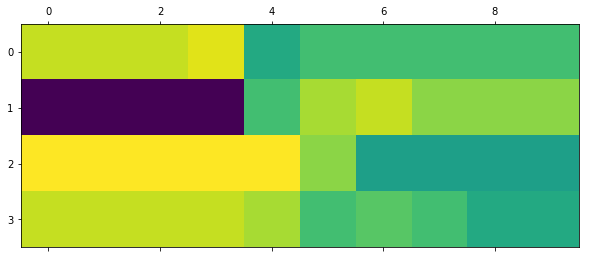

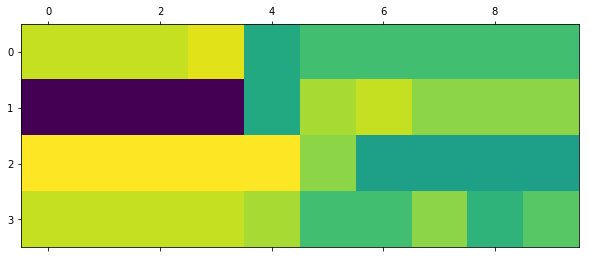

kernel had more than two levels. Assigning the end point to the high level.
C had more than two levels. Assigning the end point to the high level.


100%|█████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:37<00:00,  4.74s/it]


,kernel,C,gamma,results
0,linear,0.00001,scale,0.79
1,sigmoid,0.00001,scale,0.79
2,linear,10000.00000,scale,0.74
3,sigmoid,10000.00000,scale,0.75
4,linear,0.00001,auto,0.79


(2, 2, 2)

array([[[0.79, 0.79],
        [0.74, 0.74]],

       [[0.79, 0.79],
        [0.72, 0.75]]])

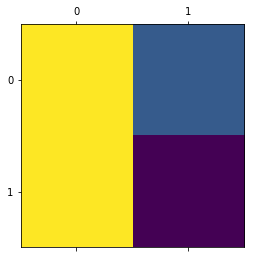

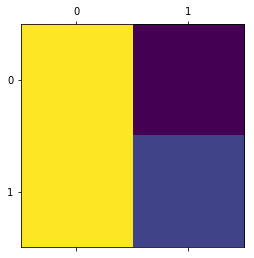

In [6]:
parameters ={'kernel':["linear", "poly", "rbf", "sigmoid"],
    'C': [float("1e{}".format(i)) for i in range(-5, 5)], 
    'gamma': ['scale', 'auto']}


for build_plan in [build.full_fact, build.frac_fact_res]:
    plan = build_plan(
        parameters
    )

    for key in {"gamma", "kernel"}:
        plan[key] = plan[key].apply(lambda elt: parameters[key][int(elt)])
    
    results = eval_plan(SVC, plan, X, y)
    enc = OrdinalEncoder()
    enc.fit(results.loc[:, results.columns != 'results'])
    indices = enc.transform(results.loc[:, results.columns != 'results'])
    display(results.head())
    shape = tuple([len(elt) for elt in enc.categories_])
    values = np.zeros(shape)
    display(values.shape)
    for idx, value in zip(indices, results['results']):
        idx = tuple(map(int, idx))
        values[idx] = value
    display(values)
    
    
    plt.matshow(values[:,:,0])
    plt.show()
    plt.close()
    plt.matshow(values[:,:,1])
    plt.show()
    plt.close()

## Numerical values

  0%|                                                                                                | 0/32 [00:00<?, ?it/s]C:\Users\luism\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\luism\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\luism\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\luism\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "t

,C,l1_ratio,results
0,1.000000e-08,0.0,0.74
1,1.000000e-07,0.0,0.62
2,1.000000e-06,0.0,0.75
3,1.000000e-05,0.0,0.56
4,1.000000e-04,0.0,0.55


(16, 2)

array([[0.74, 0.49],
       [0.62, 0.49],
       [0.75, 0.49],
       [0.56, 0.51],
       [0.55, 0.51],
       [0.87, 0.49],
       [0.9 , 0.51],
       [0.91, 0.93],
       [0.9 , 0.92],
       [0.86, 0.88],
       [0.86, 0.86],
       [0.86, 0.86],
       [0.86, 0.86],
       [0.86, 0.86],
       [0.86, 0.86],
       [0.86, 0.86]])

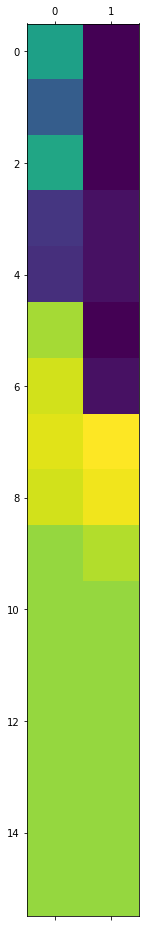

In [73]:
parameters ={
    'C':[float("1e{}".format(i)) for i in range(-8, 8)], 
    'l1_ratio':[0, 1]}

plan = build.full_fact(
    parameters
)

results = eval_plan(LogisticRegression, plan, X, y, penalty="elasticnet", solver="saga")
enc = OrdinalEncoder()
enc.fit(results.loc[:, results.columns != 'results'])
indices = enc.transform(results.loc[:, results.columns != 'results'])
display(results.head())
shape = tuple([len(elt) for elt in enc.categories_])
values = np.zeros(shape)
display(values.shape)
for idx, value in zip(indices, results['results']):
    idx = tuple(map(int, idx))
    values[idx] = value
display(values)
plt.matshow(values[:,:])
plt.show()
plt.close()


In [75]:
plans = {build.full_fact, build.frac_fact_res, build.plackett_burman, 
         build.sukharev, build.box_behnken} | {
    lambda *args, **kwargs: build.central_composite(*args, **kwargs, face=face) for face in {'ccf', 'cci', 'ccc'}} | {
    build.lhs,
    build.space_filling_lhs,
    build.random_k_means,
    build.maximin,
    build.halton,
    build.uniform_random
}

In [96]:
errors = list()
good = list()
for build_plan in plans:
    try:
        parameters ={
            'C':[float("1e{}".format(i)) for i in (-8, 8)], 
            'l1_ratio':[0, 1]}

        p = build_plan(parameters)
        display(p.head())
        print(build_plan)
        good.append((build_plan, p))
    except Exception as e:
        print("ERROR: \t{}".format(build_plan), e)
        errors.append((build_plan, e))

,C,l1_ratio
0,1.000000e-08,0.0
1,1.000000e+08,0.0
2,1.000000e-08,1.0
3,1.000000e+08,1.0
4,5.000000e+07,0.5


<function <setcomp>.<lambda> at 0x0000021B9C22DC18>


,C,l1_ratio
0,7.250132e+07,0.135964
1,2.447603e+07,0.997209


<function lhs at 0x0000021B97CDA438>
ERROR: 	<function frac_fact_res at 0x0000021B97CDCA68> Number of factors must be greater than desired resolution


,C,l1_ratio
0,1.000000e-08,0.0
1,1.000000e+08,0.0
2,1.000000e-08,1.0
3,1.000000e+08,1.0


<function full_fact at 0x0000021B86440678>
ERROR: 	<function sukharev at 0x0000021B97CDA288> unsupported operand type(s) for ** or pow(): 'NoneType' and 'float'


,C,l1_ratio
0,1.000000e-08,0.000000
1,5.000000e+07,0.333333


<function halton at 0x0000021B97CDA678>


,C,l1_ratio
0,7.304232e+06,0.818482
1,5.754550e+07,0.302251


<function maximin at 0x0000021B97CDA5E8>


,C,l1_ratio
0,1.000000e+08,0.0
1,1.000000e-08,1.0


<function space_filling_lhs at 0x0000021B97CDA4C8>


,C,l1_ratio
0,2.023021e+07,0.280644
1,1.818303e+07,0.901830


<function uniform_random at 0x0000021B97CDA708>
C had only two end points. Creating a mid-point by averaging them
l1_ratio had only two end points. Creating a mid-point by averaging them
ERROR: 	<function box_behnken at 0x0000021B97CDA318> Number of variables must be at least 3


,C,l1_ratio
0,1.000000e-08,0.0
1,1.000000e+08,0.0
2,1.000000e-08,1.0
3,1.000000e+08,1.0
4,5.000000e+07,0.5


<function <setcomp>.<lambda> at 0x0000021B9C22D948>


,C,l1_ratio
0,5.760571e+07,0.262897
1,4.866893e+07,0.758021


<function random_k_means at 0x0000021B97CDA558>


,C,l1_ratio
0,1.000000e-08,0.0
1,1.000000e+08,0.0
2,1.000000e-08,1.0
3,1.000000e+08,1.0
4,5.000000e+07,0.5


<function <setcomp>.<lambda> at 0x0000021B9C22D5E8>


,C,l1_ratio
0,1.000000e-08,0.0
1,1.000000e+08,0.0
2,1.000000e-08,1.0
3,1.000000e+08,1.0


<function plackett_burman at 0x0000021B97CDA1F8>


In [97]:
good

[(<function __main__.<setcomp>.<lambda>(*args, **kwargs)>,
                 C  l1_ratio
  0   1.000000e-08       0.0
  1   1.000000e+08       0.0
  2   1.000000e-08       1.0
  3   1.000000e+08       1.0
  4   5.000000e+07       0.5
  5   5.000000e+07       0.5
  6   1.000000e-08       0.5
  7   1.000000e+08       0.5
  8   5.000000e+07       0.0
  9   5.000000e+07       1.0
  10  5.000000e+07       0.5
  11  5.000000e+07       0.5),
 (<function doepy.build.lhs(d, num_samples=None, prob_distribution=None)>,
                C  l1_ratio
  0  7.250132e+07  0.135964
  1  2.447603e+07  0.997209),
 (<function doepy.build.full_fact(d)>,               C  l1_ratio
  0  1.000000e-08       0.0
  1  1.000000e+08       0.0
  2  1.000000e-08       1.0
  3  1.000000e+08       1.0),
 (<function doepy.build.halton(d, num_samples=None)>,               C  l1_ratio
  0  1.000000e-08  0.000000
  1  5.000000e+07  0.333333),
 (<function doepy.build.maximin(d, num_samples=None)>,
                C  l1_ratio
 